In [7]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split


In [2]:
feature_names = [
    "class", "cap-shape", "cap-surface", "cap-color", "bruises", "odor",
    "gill-attachment", "gill-spacing", "gill-size", "gill-color",
    "stalk-shape", "stalk-root", "stalk-surface-above-ring", "stalk-surface-below-ring",
    "stalk-color-above-ring", "stalk-color-below-ring", "veil-type", "veil-color",
    "ring-number", "ring-type", "spore-print-color", "population", "habitat"
]

# Read the data file into a DataFrame.
df = pd.read_csv("agaricus-lepiota.data", names=feature_names)


In [3]:
df

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [5]:
label_encoder = LabelEncoder()

for column in df.columns:
    df[column] = label_encoder.fit_transform(df[column])

In [8]:
X = df.drop(columns=['class'])  # Features
y = df['class']  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

In [9]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()
clf = clf.fit(X_train, y_train) 

In [10]:
clf.get_params() # we are using the default parameters

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [11]:
predictions = clf.predict(X_test)
predictions

array([1, 0, 1, ..., 1, 0, 1])

In [12]:
clf.predict_proba(X_test)

array([[0., 1.],
       [1., 0.],
       [0., 1.],
       ...,
       [0., 1.],
       [1., 0.],
       [0., 1.]])

In [13]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, predictions)

1.0

In [14]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, predictions, labels=[0,1])

array([[1369,    0],
       [   0, 1312]], dtype=int64)

In [15]:
from sklearn.metrics import precision_score
precision_score(y_test, predictions)

1.0

In [16]:
from sklearn.metrics import recall_score
recall_score(y_test, predictions)

1.0

In [17]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions, target_names=['edible', 'poisonous']))

              precision    recall  f1-score   support

      edible       1.00      1.00      1.00      1369
   poisonous       1.00      1.00      1.00      1312

    accuracy                           1.00      2681
   macro avg       1.00      1.00      1.00      2681
weighted avg       1.00      1.00      1.00      2681



In [18]:

feature_names = X.columns
feature_names

Index(['cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')

In [19]:
clf.feature_importances_


array([0.        , 0.        , 0.00425933, 0.03019886, 0.        ,
       0.        , 0.        , 0.13038845, 0.33425573, 0.02472507,
       0.0480765 , 0.        , 0.00532585, 0.        , 0.01415443,
       0.        , 0.        , 0.00123774, 0.00980332, 0.19628571,
       0.18770416, 0.01358484])

In [20]:
feature_importance = pd.DataFrame(clf.feature_importances_, index = feature_names).sort_values(0, ascending=False)
feature_importance

,0
gill-color,0.334256
spore-print-color,0.196286
population,0.187704
gill-size,0.130388
stalk-root,0.048076
bruises,0.030199
stalk-shape,0.024725
stalk-color-below-ring,0.014154
habitat,0.013585
ring-type,0.009803


In [21]:
features = list(feature_importance[feature_importance[0]>0].index)
features

['gill-color',
 'spore-print-color',
 'population',
 'gill-size',
 'stalk-root',
 'bruises',
 'stalk-shape',
 'stalk-color-below-ring',
 'habitat',
 'ring-type',
 'stalk-surface-below-ring',
 'cap-color',
 'ring-number']

<Axes: >

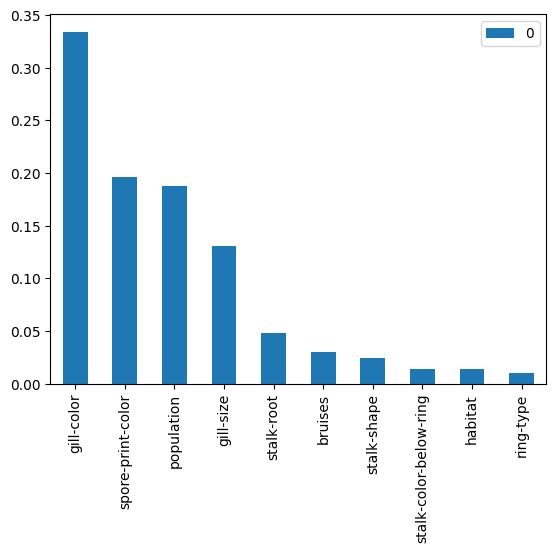

In [22]:
feature_importance.head(10).plot(kind='bar')
# Worst perimeter is the best way to know if a tumor is benign or malignant

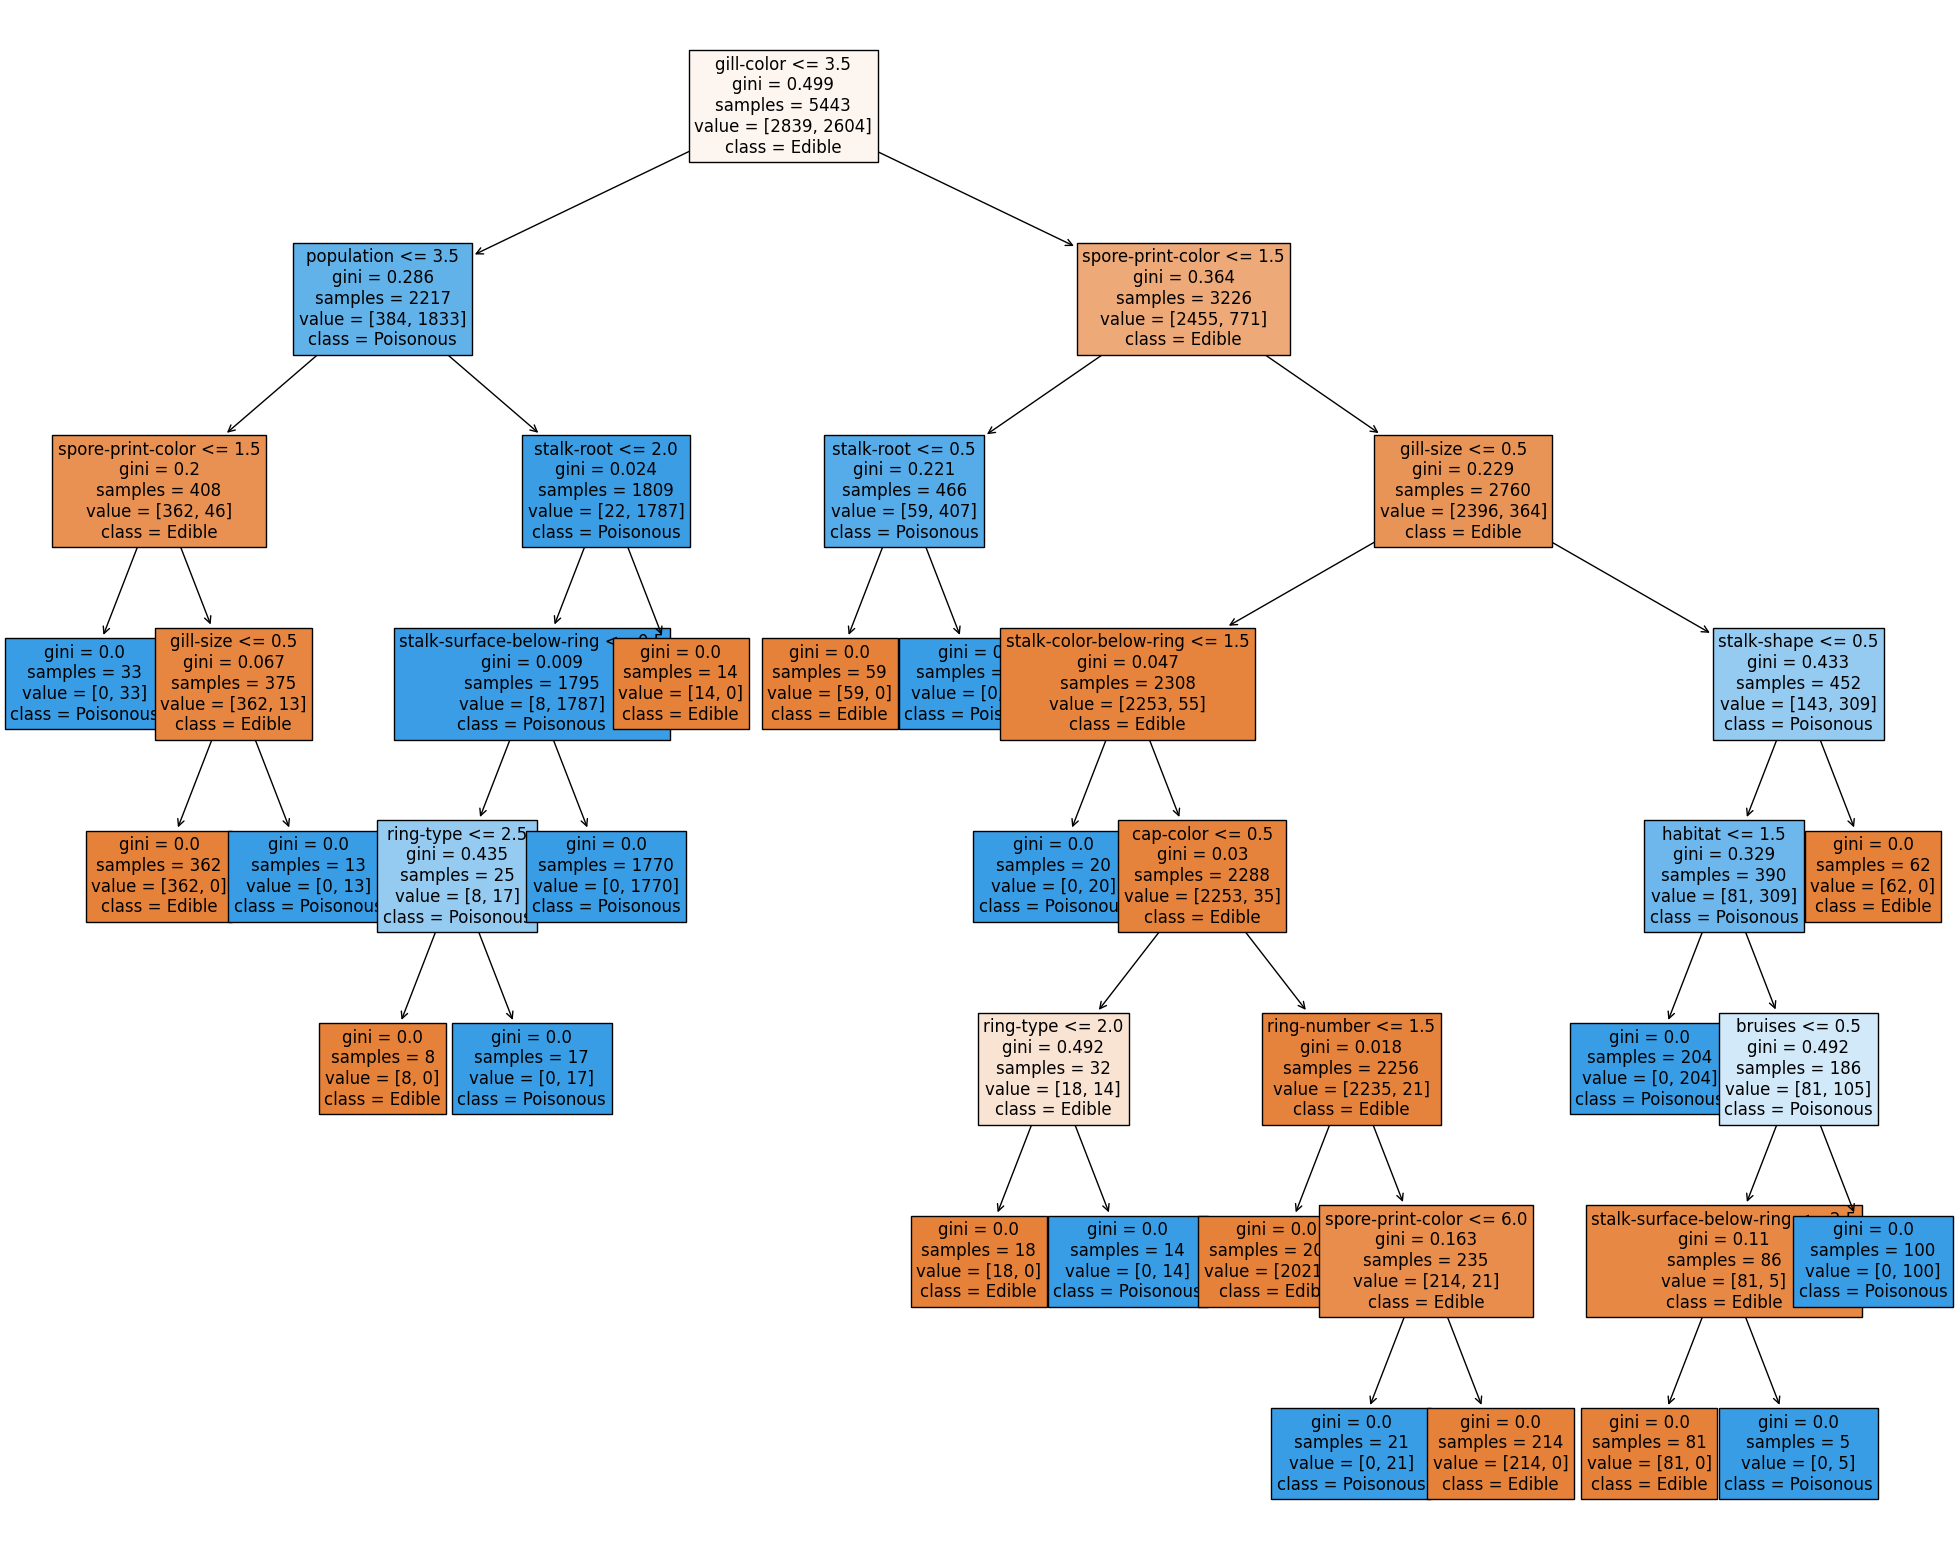

In [23]:
from sklearn import tree
from matplotlib import pyplot as plt
feature_names = list(X.columns)

fig = plt.figure(figsize=(25, 20))
_ = tree.plot_tree(clf, 
                   feature_names=feature_names,  
                   class_names=['Edible', 'Poisonous'],
                   filled=True,
                   fontsize=12)

In [24]:

# follow the first example on the tree to explain the decision_path function output
X_test.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
3976,2,0,3,0,2,1,0,0,7,0,...,1,4,4,0,2,1,2,1,4,1
1164,5,2,8,0,5,1,1,0,4,1,...,0,7,7,0,2,1,0,2,3,1
3262,5,2,5,0,1,1,1,1,7,0,...,2,7,7,0,2,1,4,3,4,0
3261,2,0,3,1,5,1,0,0,9,1,...,2,7,3,0,2,1,4,2,5,0
4279,2,0,9,0,2,1,0,0,7,0,...,1,6,6,0,2,1,2,1,5,1


In [25]:
clf.decision_path(X_test)


<2681x39 sparse matrix of type '<class 'numpy.int64'>'
	with 15796 stored elements in Compressed Sparse Row format>

In [26]:
sparse = clf.decision_path(X_test).toarray()[:101]


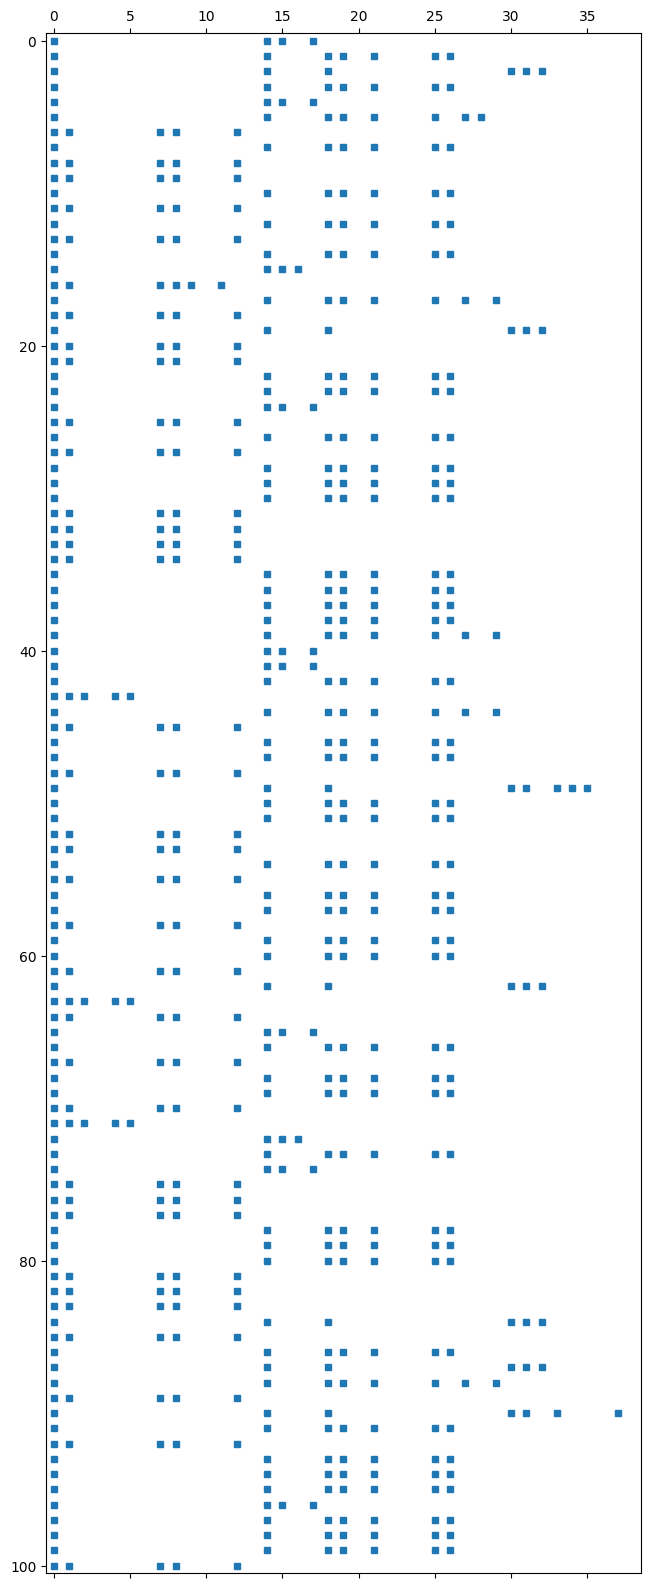

In [27]:
plt.figure(figsize=(20, 20))
plt.spy(sparse, markersize=5)